# FUNCIÓN DE DISTRIBUCIÓN ACUMULADA

**Nos permite entender la estructura general del conjunto de datos respecto a una variable**

Lo podemos usar tanto con valor continuos como discretos

Calcula rangos entre una variable y el menor valor posible según el contexto. Es una imagen de su evolución. Por  ejemplo para calcular la probabilidad de estatura tendria que ser:
- Probabilidad entre 0 y 175
- Probabilidad entre 0 y 170

Se calcula la resta

### Definición Matemática

La FDA es una función $$ F(x) $$ definida como:

$$ F(x) = P(X \leq x) $$

#### Para variables continuas

La FDA es la integral de la FDP $$ ( f(x) ) desde (-\infty) hasta (x)$$

$$ F(x) = \int_{-\infty}^{x} f(t) \, dt $$

El uso de -infinito significa el manor valor posible según el contexto

#### Para variables discretas

La FDA es la suma de las probabilidades hasta el punto \(x\):

$$ F(x) = \sum_{t \leq x} P(X = t) $$

Estas definiciones nos permiten entender cómo las probabilidades se acumulan en nuestro conjunto de datos, y por lo tanto nos dan una visión más completa de nuestra distribución.

<hr>

## Propiedades de la FDA

### 1. **Monotonicidad**
La FDA es siempre una función no decreciente. Esto tiene sentido intuitivamente porque a medida que nos desplazamos a lo largo del eje x, estamos acumulando más y más probabilidad.
Matemáticamente:
$$ F(x_2) \geq F(x_1) $$
siempre que $$ x_2 \geq x_1 $$.

### 2. **Límites**
- La FDA tiende a 0 cuando \( x \) tiende a menos infinito:
$$ \lim_{{x \to -\infty}} F(x) = 0 $$
Esto implica que la probabilidad acumulada es 0 para cualquier valor menor al mínimo en la distribución.

- La FDA tiende a 1 cuando \( x \) tiende a infinito:
$$ \lim_{{x \to \infty}} F(x) = 1 $$
Esto significa que la probabilidad acumulada es 1 para cualquier valor mayor al máximo en la distribución.

### 3. **Rango**
La FDA siempre toma valores entre 0 y 1 (inclusive), es decir:
$$ 0 \leq F(x) \leq 1 $$
Esto es coherente con el hecho de que es una probabilidad acumulada.

### 4. **Relación con la Función de Densidad de Probabilidad (FDP)**
Si la variable es continua y tiene una función de densidad \( f(x) \), entonces la FDA es el área bajo la curva de la FDP desde menos infinito hasta \( x \):
$$ F(x) = \int_{-\infty}^{x} f(t) dt $$

### 5. **Pasos en Variables Discretas**
Para variables discretas, la FDA muestra "saltos" en los puntos donde hay probabilidad. Entre esos puntos, la FDA es constante.

Estas propiedades reflejan el comportamiento fundamental de la FDA y ofrecen una visión intuitiva y matemática de cómo funciona y cómo se relaciona con otros conceptos en estadística y probabilidad.

<hr>

    Estatura       FDP       FDA
0  150.00000  0.005399  0.022750
1  150.04004  0.005442  0.022967
2  150.08008  0.005486  0.023186
3  150.12012  0.005530  0.023407
4  150.16016  0.005574  0.023629
      Estatura       FDP       FDA
995  189.83984  0.005574  0.976371
996  189.87988  0.005530  0.976593
997  189.91992  0.005486  0.976814
998  189.95996  0.005442  0.977033
999  190.00000  0.005399  0.977250
Probabilidad usando FDP: 0.1901
Probabilidad usando FDA: 0.1917


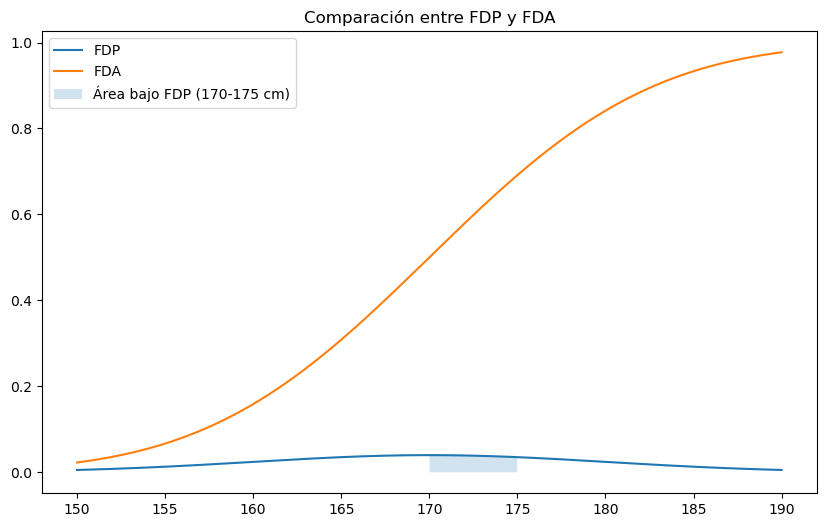

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm #cálculos de dsitribuciones normales o gaussianas

# Parámetros de la distribución
mu = 170  # media
sigma = 10  # desviación estándar

# Valores de x para graficar
x = np.linspace(150, 190, 1000) #Genera un array de números entre dos valores 190-150=40/1000

# FDP y FDA
#Probability Density Function PDF
pdf = norm.pdf(x, mu, sigma) # Calculamos la densidad(altura) para cada uno de los 1000 puntos 
#Cumulative Distribucion Function CDF
cdf = norm.cdf(x, mu, sigma) # Calcula la distribución acumulada para cada uno de los mil puntos

#En los dos casos queremos calcular la probabilidad de que una variable aleatoria "X"
#se encuentre en el intervalo entre 170 y 175cms. Pero lo hacemos de modos muy diferentes
# Probabilidad usando FDP (integrando)
#np.trapz() calcula el area bajo la curva de esos puntos utilizando trapezoides
prob_fdp = np.trapz(pdf[(x >= 170) & (x <= 175)], x[(x >= 170) & (x <= 175)]) #ercibe 2 argumentos: pdf y x entre 170 y 175

# Probabilidad usando FDA
 #Con la FDA cada uno de los mil puntos definidos representa la probabilidad acumulada para dicho punto.
 #index_170 y index_175 son los puntos 
index_170 = np.abs(x - 170).argmin() #empezamos restando a todas -170, con abs lo converitmos en postivo  
index_175 = np.abs(x - 175).argmin() # con argin() nos devuelve al valor mas cercano a 170 o 175
 #Se restan los index para obtener la probabilidad en ese punto en concreto
prob_fda = cdf[index_175] - cdf[index_170]



# Crear DataFrame para visualizar
df = pd.DataFrame({
    'Estatura': x, #eje X
    'FDP': pdf, #eje Y
    'FDA': cdf #eje Y
})

print(df.head(5))
print(df.tail(5))


print(f"Probabilidad usando FDP: {prob_fdp:.4f}")
print(f"Probabilidad usando FDA: {prob_fda:.4f}")

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label="FDP")
plt.plot(x, cdf, label="FDA")
plt.fill_between(x, pdf, 0, where=((x >= 170) & (x <= 175)), alpha=0.2, label="Área bajo FDP (170-175 cm)")
plt.title("Comparación entre FDP y FDA")
plt.legend()
plt.show()


<hr>

#### Calculo de la CDF cpn valores discretos
Ejemplo: Vamos a lanzar el dado 3 veces y calcular la probabilidad de que salga el nº 5.

- Para obtener 0 cincos X=0--> $P(X=0) = \left(\frac{5}{6}\right)^3 = \frac{125}{216}$ Al lanzar el dado una sola vez, hay 5 posibilidades de que "no salga 5" y una de que "sí salga 5"
- Para obtener 1 cinco X=1--> $P(X=1) = 3 \times \left(\frac{5}{6}\right)^2 \times \frac{1}{6} = \frac{75}{216}$ En un solo lanzamiento la probabilidad de un 5 es de "1/6" y de no tener un 5 es de "5/6"
- Para obtener 2 cincos X=2 --> $P(X=2) = 3 \times \left(\frac{5}{6}\right) \times (\frac{1}{6})^2 = \frac{15}{216}$
- Para obtener 3 cincos X=3 --> $P(X=3) = \left(\frac{1}{6}\right)^3 = \frac{1}{216}$

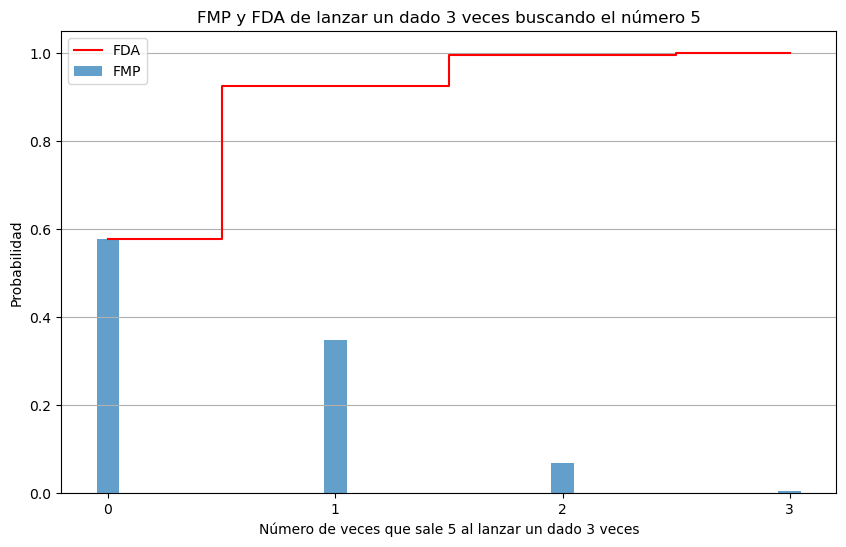

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la Función de Masa de Probabilidad (FMP)
x_vals = np.array([0, 1, 2, 3]) #valores x posibles
pmf_vals = np.array([125/216, 75/216, 15/216, 1/216]) #probabilidades para cada uno de los X

# Calculamos la Función de Distribución Acumulada (FDA)
#para 1er elemento: 125/216 = 0.5787
#para 2o elemento:125/216+ 75/216 = 200/216 = 0.9259
#para 3er elemento: 125/2166 + 75/216 + 15/216 = 215/216 = 0.9954
#para 4to elemento : 125/2166 + 75/216 + 15/216 + 1/216 = 1 
cdf_vals = np.cumsum(pmf_vals)#sumar los valores PDF 

# Graficamos
plt.figure(figsize=(10,6))

# Graficamos la FMP
plt.bar(x_vals, pmf_vals, width=0.1, align='center', label='FMP', alpha=0.7)

# Graficamos la FDA
plt.step(x_vals, cdf_vals, where='mid', label='FDA', color='red')

plt.xticks(x_vals)
plt.xlabel('Número de veces que sale 5 al lanzar un dado 3 veces')
plt.ylabel('Probabilidad')
plt.title('FMP y FDA de lanzar un dado 3 veces buscando el número 5')
plt.legend()
plt.grid(axis='y')

plt.show()
